In [16]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM

In [17]:
df = pd.read_csv("vix_2011_2019.csv")

In [18]:
print(df.head())

         Date       Open       High        Low      Close  Adj Close  Volume
0  2011-01-03  17.940001  17.950001  16.910000  17.610001  17.610001       0
1  2011-01-04  17.340000  18.240000  17.330000  17.379999  17.379999       0
2  2011-01-05  17.809999  17.950001  16.860001  17.020000  17.020000       0
3  2011-01-06  16.799999  17.559999  16.790001  17.400000  17.400000       0
4  2011-01-07  17.309999  18.070000  16.570000  17.139999  17.139999       0


In [19]:
df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 2 columns):
Date         2068 non-null object
Adj Close    2068 non-null float64
dtypes: float64(1), object(1)
memory usage: 32.4+ KB


In [21]:
df['Date'] = pd.to_datetime(df['Date'])

In [22]:
df = df.set_index(['Date'], drop=True)

In [23]:
df.head(10)

,Adj Close
Date,
2011-01-03,17.610001
2011-01-04,17.379999
2011-01-05,17.020000
2011-01-06,17.400000
2011-01-07,17.139999
2011-01-10,17.540001
2011-01-11,16.889999
2011-01-12,16.240000
2011-01-13,16.389999


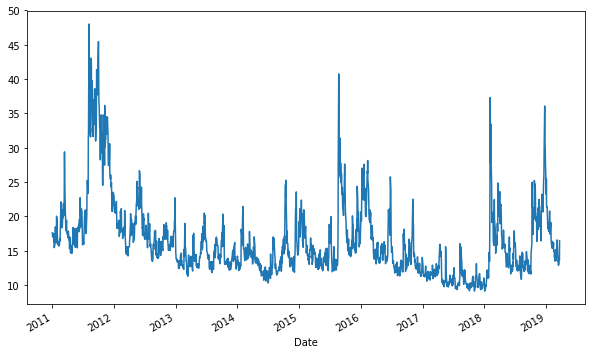

In [24]:
# df = df.sort_index()
plt.figure(figsize=(10, 6))
df['Adj Close'].plot();

In [25]:
split_date = pd.Timestamp('2018-01-01')

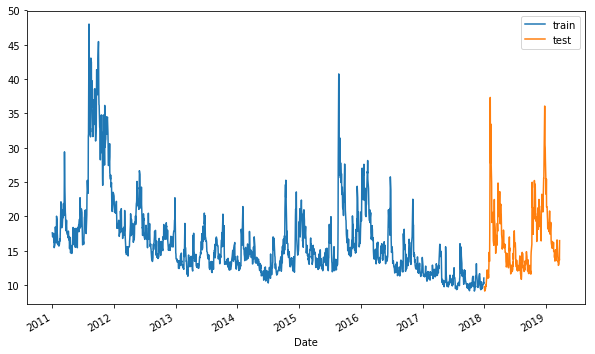

In [26]:
df =  df['Adj Close']
train = df.loc[:split_date]
test = df.loc[split_date:]
plt.figure(figsize=(10, 6))
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test']);

In [30]:
# scale train and test data to [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
train_sc = scaler.fit_transform(train.values.reshape(-1, 1))
test_sc = scaler.transform(test.values.reshape(-1, 1))

In [31]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

## NN

In [32]:
nn_model = Sequential()
nn_model.add(Dense(12, input_dim=1, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/100
1760/1760 [==============================] - 1s 758us/step - loss: 0.0176
Epoch 2/100
1760/1760 [==============================] - 1s 487us/step - loss: 0.0064
Epoch 3/100
1760/1760 [==============================] - 1s 489us/step - loss: 0.0061
Epoch 4/100
1760/1760 [==============================] - 1s 487us/step - loss: 0.0060
Epoch 5/100
1760/1760 [==============================] - 1s 487us/step - loss: 0.0060
Epoch 6/100
1760/1760 [==============================] - 1s 489us/step - loss: 0.0060
Epoch 7/100
1760/1760 [==============================] - 1s 488us/step - loss: 0.0060
Epoch 8/100
1760/1760 [==============================] - 1s 488us/step - loss: 0.0060
Epoch 9/100
1760/1760 [==============================] - 1s 475us/step - loss: 0.0060
Epoch 10/100
1760/1760 [==============================] - 1s 466us/step - loss: 0.0060
Epoch 11/100
1760/1760 [==============================] - 1s 463us/step - loss: 0.0060
Epoch 12/100
1760/1760 [============================

In [33]:
y_pred_test_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))

The R2 score on the Train set is:	0.902
The R2 score on the Test set is:	0.797


## LSTM

In [34]:
train_sc_df = pd.DataFrame(train_sc, columns=['Y'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Y'], index=test.index)

for s in range(1,2):
    train_sc_df['X_{}'.format(s)] = train_sc_df['Y'].shift(s)
    test_sc_df['X_{}'.format(s)] = test_sc_df['Y'].shift(s)

X_train = train_sc_df.dropna().drop('Y', axis=1)
y_train = train_sc_df.dropna().drop('X_1', axis=1)

X_test = test_sc_df.dropna().drop('Y', axis=1)
y_test = test_sc_df.dropna().drop('X_1', axis=1)

X_train = X_train.as_matrix()
y_train = y_train.as_matrix()

X_test = X_test.as_matrix()
y_test = y_test.as_matrix()

C:\Softwares\anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Softwares\anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
C:\Softwares\anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Softwares\anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [35]:
X_train_lmse = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lmse = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print('Train shape: ', X_train_lmse.shape)
print('Test shape: ', X_test_lmse.shape)

Train shape:  (1760, 1, 1)
Test shape:  (306, 1, 1)


In [36]:
lstm_model = Sequential()
lstm_model.add(LSTM(7, input_shape=(1, X_train_lmse.shape[1]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history_lstm_model = lstm_model.fit(X_train_lmse, y_train, epochs=100, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/100
1760/1760 [==============================] - 3s 2ms/step - loss: 0.0376
Epoch 2/100
1760/1760 [==============================] - 2s 1ms/step - loss: 0.0067
Epoch 3/100
1760/1760 [==============================] - 2s 1ms/step - loss: 0.0060
Epoch 4/100
1760/1760 [==============================] - 2s 1ms/step - loss: 0.0059
Epoch 5/100
1760/1760 [==============================] - 2s 1ms/step - loss: 0.0059
Epoch 6/100
1760/1760 [==============================] - 2s 1ms/step - loss: 0.0059
Epoch 7/100
1760/1760 [==============================] - 2s 1ms/step - loss: 0.0059
Epoch 8/100
1760/1760 [==============================] - 2s 1ms/step - loss: 0.0059
Epoch 9/100
1760/1760 [==============================] - 2s 1ms/step - loss: 0.0059
Epoch 10/100
1760/1760 [==============================] - 2s 1ms/step - loss: 0.0059
Epoch 11/100
1760/1760 [==============================] - 2s 1ms/step - loss: 0.0059
Epoch 12/100
1760/1760 [==============================] - 2s 1ms/step - lo

In [37]:
y_pred_test_lstm = lstm_model.predict(X_test_lmse)
y_train_pred_lstm = lstm_model.predict(X_train_lmse)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))

The R2 score on the Train set is:	0.888
The R2 score on the Test set is:	0.773


In [38]:
nn_test_mse = nn_model.evaluate(X_test, y_test, batch_size=1)
lstm_test_mse = lstm_model.evaluate(X_test_lmse, y_test, batch_size=1)
print('NN: %f'%nn_test_mse)
print('LSTM: %f'%lstm_test_mse)

306/306 [==============================] - 0s 650us/step
NN: 0.012051
LSTM: 0.013433


In [39]:
nn_y_pred_test = nn_model.predict(X_test)
lstm_y_pred_test = lstm_model.predict(X_test_lmse)

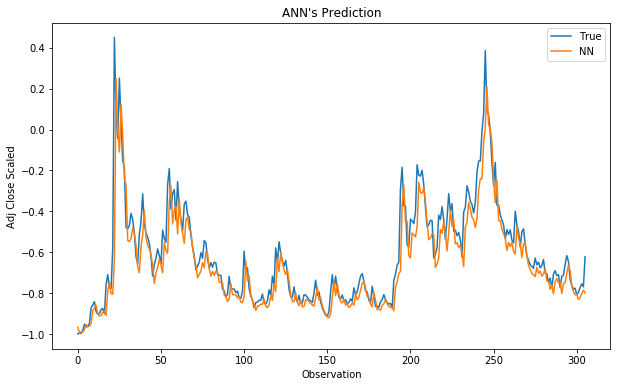

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_nn, label='NN')
plt.title("ANN's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close Scaled')
plt.legend()
plt.show();

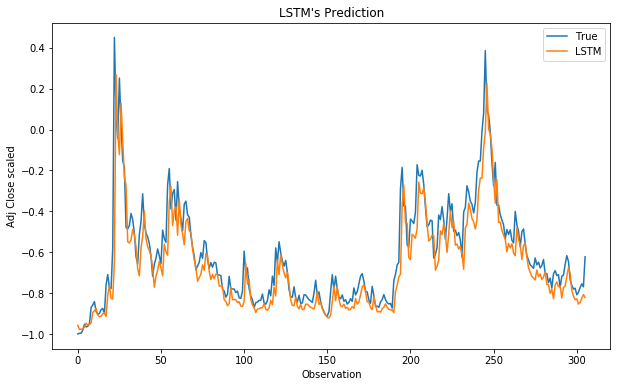

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close scaled')
plt.legend()
plt.show();